In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
commit_df = pd.read_csv('oss_data/commits.csv')
issues_df = pd.read_csv('oss_data/issues.csv')
pr_df = pd.read_csv('oss_data/pull_requests.csv')

# clean up dfs
commit_df.drop(columns=['Unnamed: 0', 'data_collection_date'], inplace=True)
issues_df.drop(columns=['Unnamed: 0', 'data_collection_date'], inplace=True)
pr_df.drop(columns=['Unnamed: 0', 'data_collection_date'], inplace=True)


In [87]:
commit_df.shape

(4453789, 5)

In [85]:
issues_df.shape

(68974, 5)

In [83]:
pr_df.shape

(1000, 6)

In [88]:
comb_df = pd.concat([pr_df, commit_df, issues_df], ignore_index=True).where(pd.notnull(pd.concat([pr_df, commit_df], ignore_index=True)), None)
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4523763 entries, 0 to 4523762
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   repo_id           float64
 1   repo_name         object 
 2   event_type        object 
 3   event_datetime    object 
 4   contributor_name  object 
 5   pr_merge_status   object 
dtypes: float64(1), object(5)
memory usage: 207.1+ MB


In [73]:
comb_df.value_counts('event_type')

event_type
commit                  4453789
pull_request_created       1000
Name: count, dtype: int64

In [74]:
comb_df.sort_values(by='contributor_name')

,repo_id,repo_name,event_type,event_datetime,contributor_name,pr_merge_status
1536919,25952,yt,commit,2010-12-02 17:20:00-06:00,"""Stephen Skory stephenskory@yahoo.com""",None
742066,25992,landlab,commit,2013-04-23 00:16:20-05:00,(no author),None
742110,25992,landlab,commit,2013-04-23 00:16:20-05:00,(no author),None
742056,25992,landlab,commit,2013-04-23 00:16:20-05:00,(no author),None
742057,25992,landlab,commit,2013-04-23 00:16:20-05:00,(no author),None
...,...,...,...,...,...,...
754902,25917,psi4,commit,2017-07-12 11:23:46-05:00,None,None
754905,25917,psi4,commit,2017-07-01 20:25:46-05:00,None,None
754906,25917,psi4,commit,2017-07-01 20:25:46-05:00,None,None
1074128,25952,yt,commit,2007-02-08 22:13:58-06:00,None,None


In [75]:
comb_df[comb_df['contributor_name'] is not None and comb_df['contributor_name'] != '(no author)']

,repo_id,repo_name,event_type,event_datetime,contributor_name,pr_merge_status
0,25952,yt,pull_request_created,2023-03-27 22:07:35,neutrinoceros,not merged
1,25888,de_rle,pull_request_created,2020-11-09 22:12:51,dgosselin-p4,merged
2,25880,Gklee,pull_request_created,2021-03-23 02:09:26,tanmaytirpankar,not merged
3,25952,yt,pull_request_created,2023-03-27 19:21:09,matthewturk,not merged
4,25939,ompi,pull_request_created,2021-03-17 00:55:44,rhc54,merged
...,...,...,...,...,...,...
4454784,25939,ompi,commit,2013-05-01 11:01:48-05:00,Nathan Hjelm,None
4454785,25939,ompi,commit,2013-05-01 11:01:48-05:00,Nathan Hjelm,None
4454786,25939,ompi,commit,2013-05-01 11:01:48-05:00,Nathan Hjelm,None
4454787,25939,ompi,commit,2013-05-01 11:01:48-05:00,Nathan Hjelm,None


In [76]:
comb_df.drop_duplicates(inplace=True)

In [77]:
comb_df.head()

,repo_id,repo_name,event_type,event_datetime,contributor_name,pr_merge_status
0,25952,yt,pull_request_created,2023-03-27 22:07:35,neutrinoceros,not merged
1,25888,de_rle,pull_request_created,2020-11-09 22:12:51,dgosselin-p4,merged
2,25880,Gklee,pull_request_created,2021-03-23 02:09:26,tanmaytirpankar,not merged
3,25952,yt,pull_request_created,2023-03-27 19:21:09,matthewturk,not merged
4,25939,ompi,pull_request_created,2021-03-17 00:55:44,rhc54,merged


In [78]:
import random
num = int(random.random() * (comb_df['contributor_name'].nunique()))
name = comb_df.iloc[5724]['contributor_name']
name

'Fabio Silva'

In [79]:
person_df = comb_df[comb_df['contributor_name'] == name]
person_df

,repo_id,repo_name,event_type,event_datetime,contributor_name,pr_merge_status
1008,26105,bbp,commit,2022-03-28 02:16:31-05:00,Fabio Silva,None
1017,26105,bbp,commit,2018-05-22 18:19:50-05:00,Fabio Silva,None
1018,26105,bbp,commit,2021-01-27 12:17:22-06:00,Fabio Silva,None
1102,26105,bbp,commit,2021-03-15 03:43:40-05:00,Fabio Silva,None
1112,26105,bbp,commit,2020-08-28 02:59:35-05:00,Fabio Silva,None
...,...,...,...,...,...,...
3221966,25874,pegasus,commit,2011-09-23 18:41:23-05:00,Fabio Silva,None
3221968,25874,pegasus,commit,2011-03-11 11:37:53-06:00,Fabio Silva,None
3221969,25874,pegasus,commit,2012-02-22 18:35:15-06:00,Fabio Silva,None
3221972,25874,pegasus,commit,2010-11-19 14:14:09-06:00,Fabio Silva,None


<Axes: xlabel='event_datetime', ylabel='event_type'>

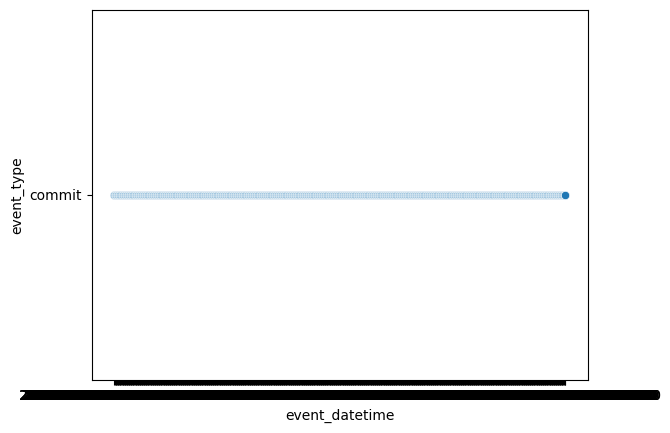

In [80]:
sns.scatterplot(data=person_df, x='event_datetime', y='event_type')